In [303]:
%matplotlib inline
from __future__ import division                                                 
import matplotlib.pyplot as plt                                                 
import numpy as np                                                              
import pandas as pd                                                             

In [418]:
def featureNormalize(X):
    X_norm = X
    # normalization involves float answers and this array intially is all int
    # so we need to make sure that the results are properly cast to be float! 
    # this is a serious pain in the ass!
    X_norm = X_norm.astype(np.float32, copy=False) 

    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    for i in range(0, X.shape[1]):
        mu[i] = X.mean(axis=0)[i]
        # numpy uses std with (N) denominator std dev formula; to get the same answer as in octave
        sigma[i] = X.std(axis=0, ddof=1)[i]
        A = X_norm[:, i][:, None]
        # normalize each element in X
        ans  = (A - mu[i]) / sigma[i]
        X_norm[:, i] = ans[:, 0]
    return X_norm, mu, sigma

    # adding intercept term
    X = np.c_[np.ones(X.shape[0]), X]

In [419]:
def computeCostMulti(X, y, theta):
    J = 1/(2*m) * np.sum(np.square(X.dot(theta) - y))
    return J

In [420]:
def gradientDescentMulti(X, y, theta, alpha, num_iter):
    J_history = np.zeros(num_iter)[:, None]
    for i in range(0, num_iter):
        theta = theta - ((alpha / m) * np.transpose(X).dot((X.dot(theta) - y)))
        J_history[i] = computeCostMulti(X, y, theta)
    return theta, J_history

Theta computed from gradient descent: 
[[ 334302.07023381]
 [ 100087.11015567]
 [   3673.55098734]]
Predicted price of a 1650 sq-ft, 3 br house(gradient descent) 
289314.628593
[[ 89597.90954361]
 [   139.21067402]
 [ -8738.01911255]]
Predicted price of a 1650 sq-ft, 3 br house(normal eq) 
293081.464335


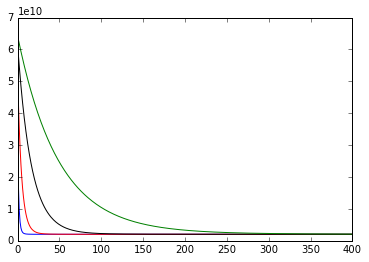

In [424]:
# reading data in
data = pd.read_csv('ex1data2.txt', sep=",", header=None)
# naming the columns makes it easier to locate them
data.columns = ['x1', 'x2', 'y']

# # setting pretty print
# np.set_printoptions(precision=5)

# convert pandas data frame into numpy array
x1 = data.iloc[:, 0].values[:, None]                                                     
x2 = data.iloc[:, 1].values[:, None]                                                    
y = data.iloc[:, 2].values[:, None]
# join x1 and x2 to make one array of X
X = np.concatenate((x1, x2), axis=1)
m = len(y)
# print X
# normalizing features
X, mu, sigma = featureNormalize(X)
# adding intercept term
X = np.c_[np.ones(X.shape[0]), X]

# alpha = 0.3
theta = np.zeros(3)[:, None] 
theta, J_h1 = gradientDescentMulti(X, y, theta, alpha=0.3, num_iter=400)

# alpha = 0.1
theta = np.zeros(3)[:, None] 
theta, J_h2 = gradientDescentMulti(X, y, theta, alpha=0.1, num_iter=400)

# alpha = 0.03
theta = np.zeros(3)[:, None] 
theta, J_h3 = gradientDescentMulti(X, y, theta, alpha=0.03, num_iter=400)

# alpha = 0.01
theta = np.zeros(3)[:, None] 
theta, J_h4 = gradientDescentMulti(X, y, theta, alpha=0.01, num_iter=400)


# plotting convergence graph
plt.plot(np.arange(400), J_h1, 'b')
plt.plot(np.arange(400), J_h2, 'r')
plt.plot(np.arange(400), J_h3, 'k')
plt.plot(np.arange(400), J_h4, 'g')

print 'Theta computed from gradient descent: '
print(theta)

print 'Predicted price of a 1650 sq-ft, 3 br house(gradient descent) '
o = (1650 - mu[0]) / sigma[0]
t = (3 - mu[1]) / sigma[1]
price = np.array([1, o, t]).dot(theta)
print(price[0])

# using normal eq!
x1 = data.iloc[:, 0].values[:, None]                                                     
x2 = data.iloc[:, 1].values[:, None]                                                    
y = data.iloc[:, 2].values[:, None]
# join x1 and x2 to make one array of X
X = np.concatenate((x1, x2), axis=1)
X = np.c_[np.ones(X.shape[0]), X]
m = len(y)
theta = np.zeros(3)[:, None] 
theta = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
print(theta)
print 'Predicted price of a 1650 sq-ft, 3 br house(normal eq) '
print(np.array([1, 1650, 3]).dot(theta)[0])